# SUPPORT VECTOR MACHINE


In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red(1).csv')

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#Let's check the data distribution
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

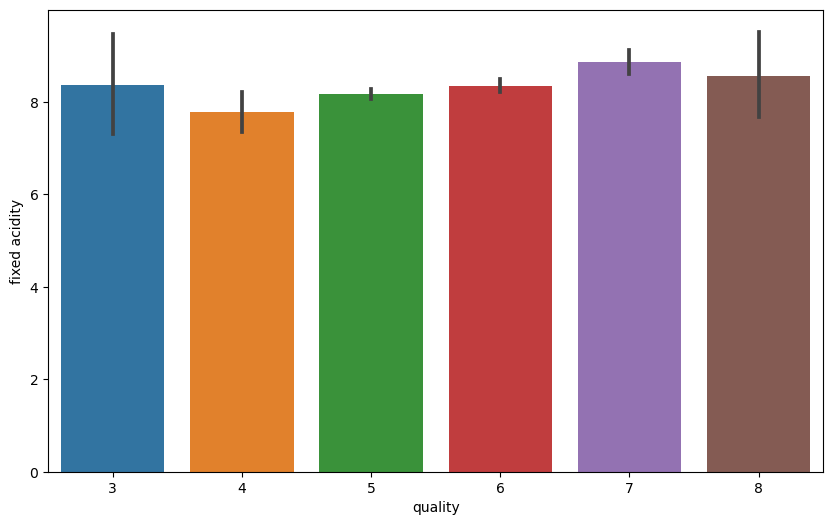

In [6]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

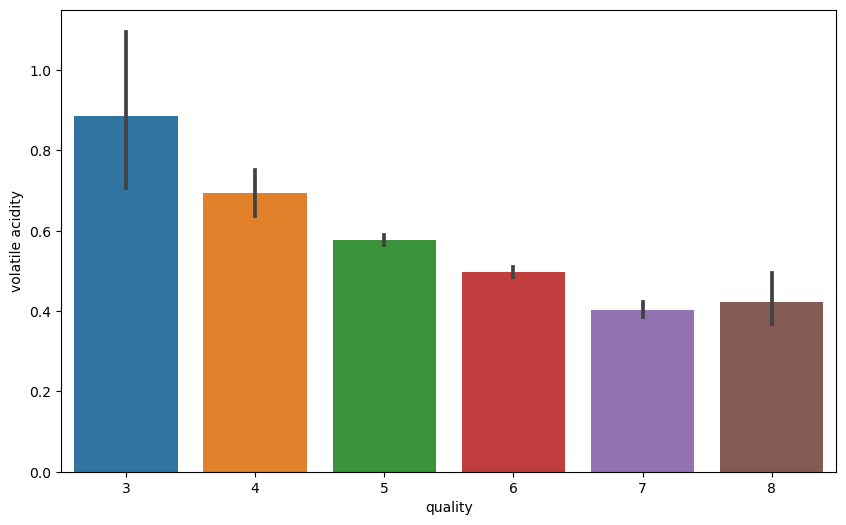

In [7]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

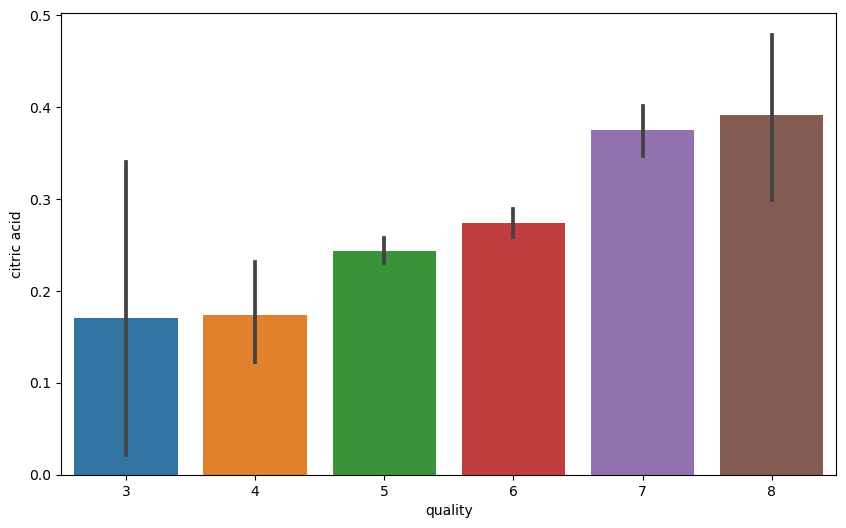

In [8]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='citric acid', data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

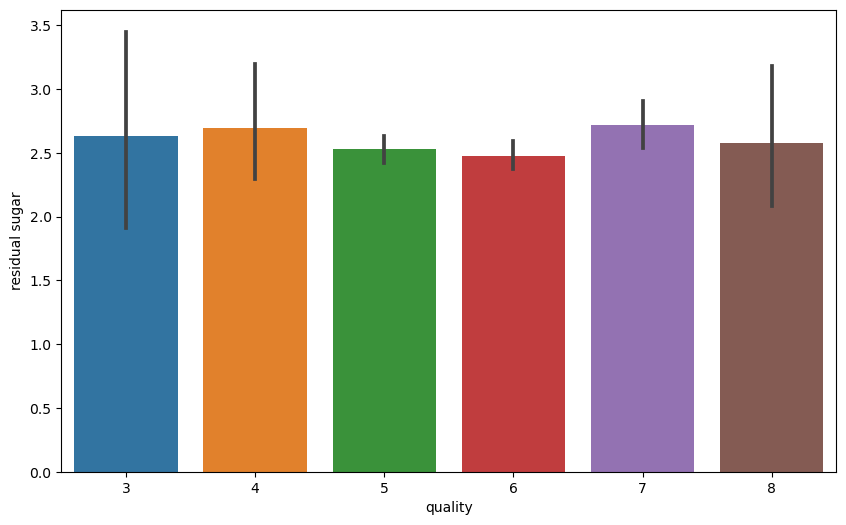

In [9]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

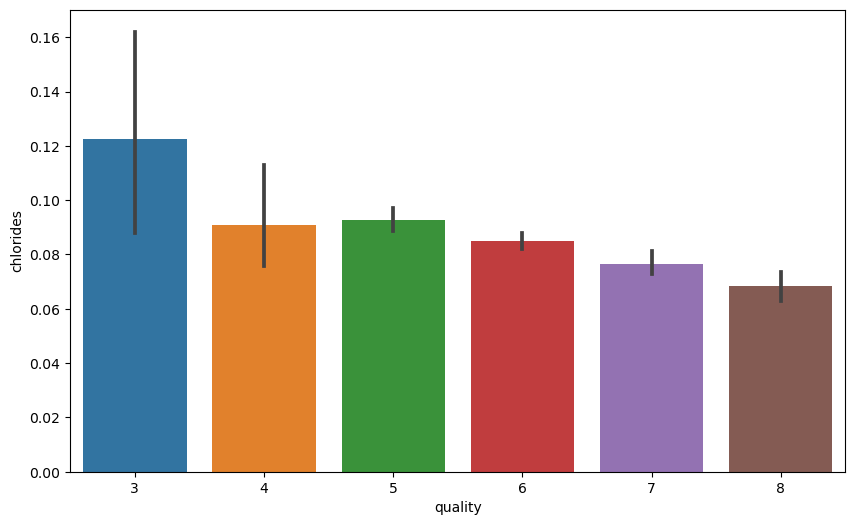

In [10]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='chlorides', data=wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

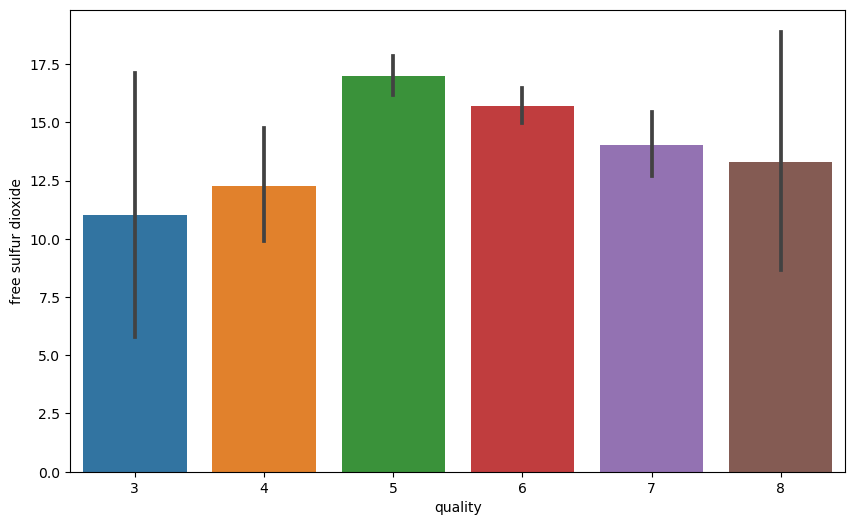

In [11]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

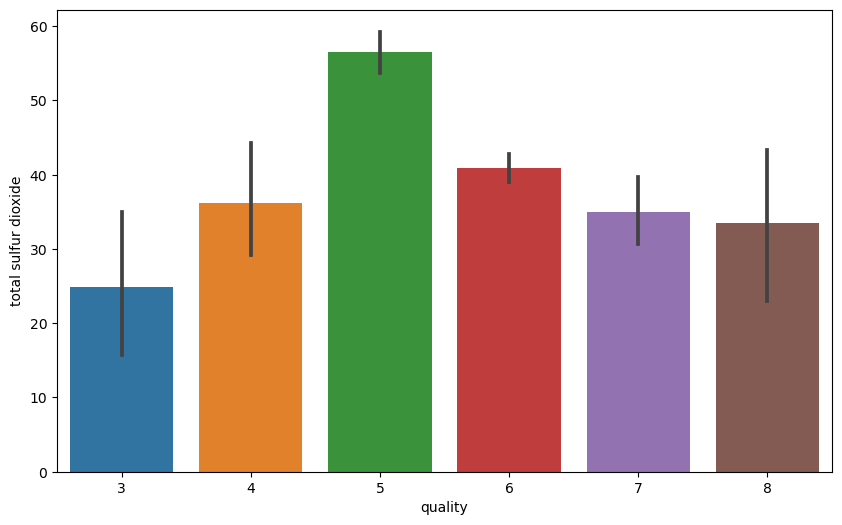

In [12]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='density'>

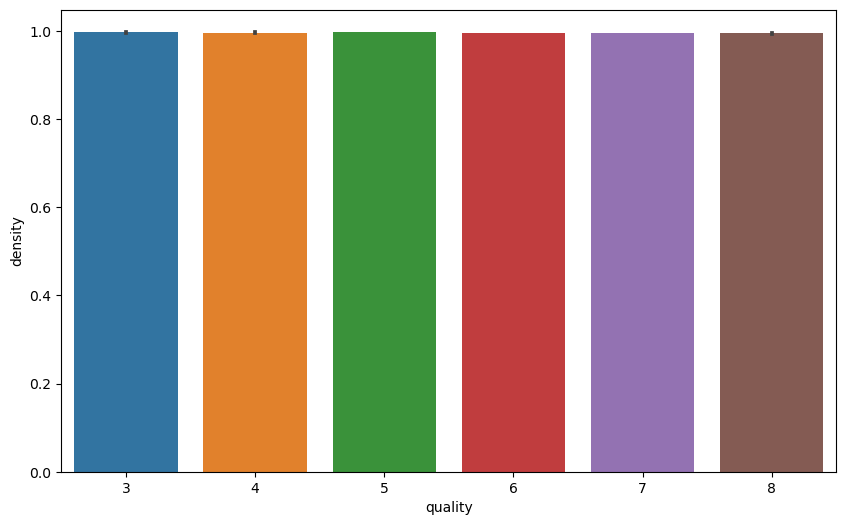

In [13]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='density', data=wine)

<Axes: xlabel='quality', ylabel='pH'>

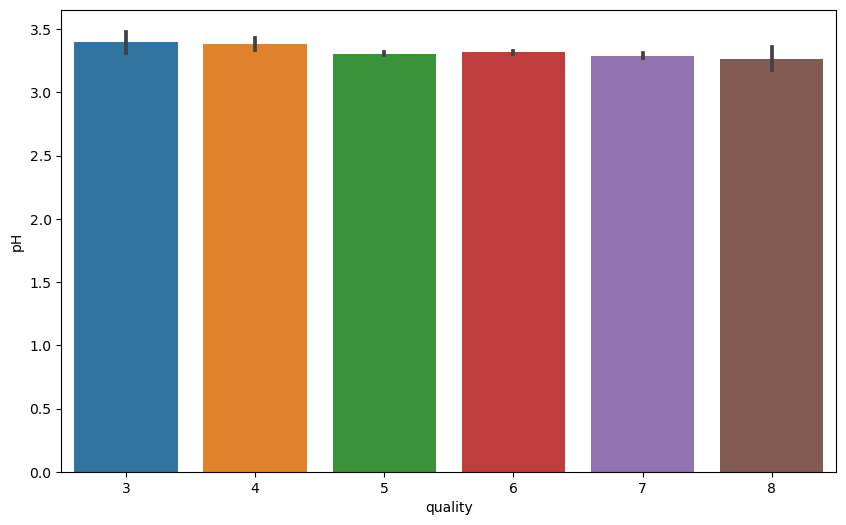

In [14]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='pH', data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

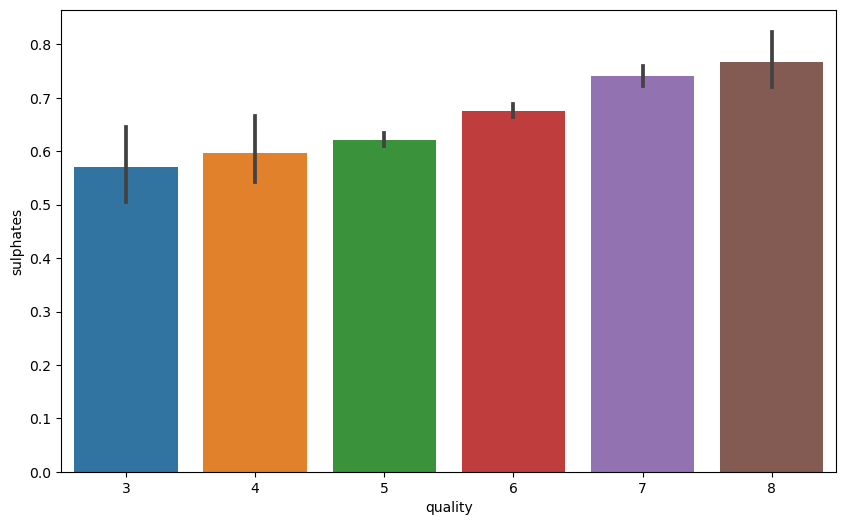

In [15]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='sulphates', data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

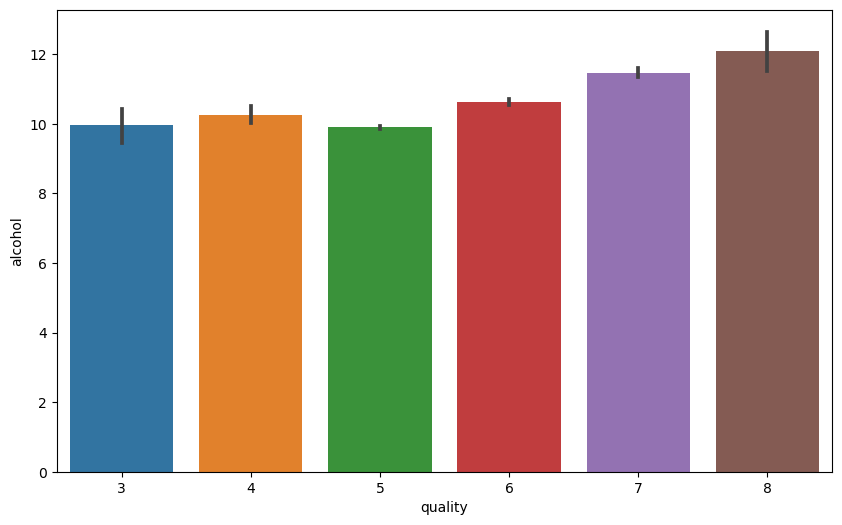

In [16]:
fig=plt.figure(figsize = (10,6))
sns.barplot(x='quality', y='alcohol' , data=wine)

In [17]:
corr_matrix=wine.corr()

In [18]:
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

## Preprocessing data for performing Machine Learning algorithm

In [19]:
#Making binary classification for the response variable.
#Dividing wine as good and bad by giving the limit for the quality.
bins=(2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels = group_names)

In [20]:
label_quality = LabelEncoder()

In [21]:
#Bad becomes 0 and Good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [22]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

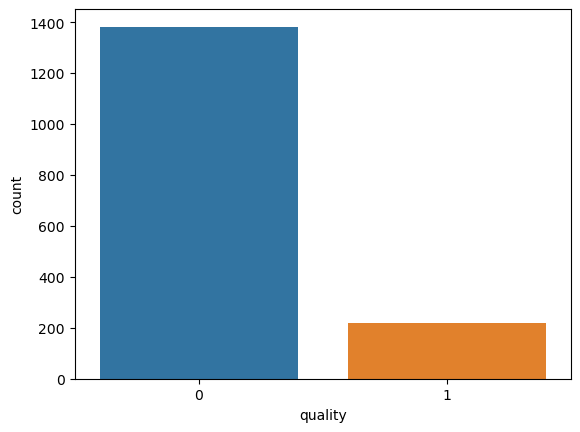

In [23]:
sns.countplot(x=wine['quality'])

In [24]:
X=wine.drop('quality', axis=1)
Y=wine['quality']

In [51]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = 0.4, random_state= 4500)

In [52]:
sc= StandardScaler()

In [53]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Support Vector Classifiers

In [56]:
svc= SVC()
svc.fit(X_train,Y_train)
pred_svc = svc.predict(X_test)

In [57]:
print(classification_report(Y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       552
           1       0.88      0.26      0.40        88

    accuracy                           0.89       640
   macro avg       0.89      0.63      0.67       640
weighted avg       0.89      0.89      0.87       640



## Lets try to increase our accuracy of the models 

### Grid Search CV

In [58]:
param= {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc= GridSearchCV(svc,param_grid=param,scoring='accuracy',cv=10)

In [59]:
grid_svc.fit(X_train,Y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [60]:
grid_svc.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [61]:
best_score = grid_svc.best_score_
best_score

0.8956781914893617

In [36]:
svc2 = SVC(C=1.2, gamma=0.9, kernels='rbf')


TypeError: SVC.__init__() got an unexpected keyword argument 'kernels'